# Homework 2 - How do Taxis move in NYC?

## Claudio Battiloro 


#### (Matteo Cavalletti, MuhammadAnwar Alam)

In this assignment we perform an analysis of Taxis in NYC. In particular, we are curious to answer to some specific research questions (RQs) that may help Taxi drivers in planning their movements throughout the city and the Taxi's users to have hints about the convenience of enjoying this service.

First of all, we need to import the necessary libs:

In [2]:
import pandas
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from IPython.display import display
import pickle


To avoid time issues while loading and deleting and reloading (ecc. ecc.) datasets, we've choosen to load and serialize all of them once using $pickle$ lib, due to the fact that the unserializing operation is pretty fast.

In [7]:
# We start loading the taxi zone lookup dataset
taxi_look = pandas.read_csv(r"D:\Claudio\Uni\M 1° anno Sapienza\AMDS\Homeworks\Hw 2\Yellow Cab Data\taxi_zone_lookup.csv", usecols = ["LocationID", "Borough"], engine = "python")
taxi_look = taxi_look.rename(columns = {"LocationID" : "PULocationID"})

In [57]:
# Then we find the columns of taxi movements datasets that are not useful for this analysis in order to not load them at all.
not_use = ["extra", "mta_tax", "improvement_surcharge", "VendorID", "RatecodeID", "store_and_fwd_flag", "tip_amount", "tolls_amount", "total_amount"]

# And start  serializing datasets
for month in range (1,7) :
    taxi = pandas.read_csv(r"D:\Claudio\Uni\M 1° anno Sapienza\AMDS\Homeworks\Hw 2\Yellow Cab Data\yellow_tripdata_2018-0" + str(month) + ".csv",usecols = [col for col in cols if col not in not_use], engine = "python")
    taxi = taxi.merge(taxi_look, on = "PULocationID", how = "inner") # Associate "PULocation ID" to the borough by merging 
                                                                     # the current dataset with the taxi zone lookup df
    with open("taxi-2018-0" + str(month), "wb") as f :
        pickle.dump(taxi, f)
    del taxi
    


We've choosen to run the analysis creating a function for every request. This, clearly, it's not the fastest way in terms of running time because it precludes the possibility of merge different requestes, but makes the code clearier and easier to understand. Of course, it's also permits to modify single requestes without changing the entire code and don't worrying about memory issues.
All this funtions are stored in the following .py:

In [4]:
import Hw2f_lib as h

### [RQ1] 
In what period of the year Taxis are used more? Create a plot that, for each month, shows the average number of trips recorded each day. Due to the differences among New York zones, we want to visualize the same information for each boroughs. Do you notice any difference among them? Provide comments and plausible explanations about what you observe (e.g.: what is the month with the highest daily average?).

### Answer :

In order to satisfy the request, we implemented a function that takes the number of months we are interested in and returns a Data Frame indexed by borough (also all NYC) and containing the average number of trip per day for every month.
For this request, the idea is to not discard any data becouse, even if there could be weird values on other columns, the trip (almost) surely there was, no matter how.

In [108]:
rq1 = h.RQ1(6)
rq1

,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06
Borough,,,,,,
Bronx,238.4,234.5,333.2,347.9,350.7,340.5
Brooklyn,3233.9,3396.5,3965.7,3969.1,3961.7,4098.7
EWR,18.4,17.8,21.3,23.3,24.2,22.6
Manhattan,256958.2,277424.3,276408.6,280959.9,269354.3,262627.0
Queens,16997.0,17304.3,18221.1,19877.5,19704.2,19158.2
Staten Island,4.6,3.9,4.5,4.3,4.6,5.0
Unknown,5126.2,4907.2,5251.3,5001.9,4150.6,4209.0
NYC,282576.6,303288.4,304205.7,310183.8,297550.4,290461.0


As we can see from the resulting df, almost all yellow cab runs start in Manhattan, and this is what we expected. In fact, the Street Liveries, which are more popularly known as Green or Boro Cabs, cannot provide hail service to passengers below West 110th Street and East 96th Street (Manhattan) , or at the two NYC airports. So, this zones are totally served only by Yellow Cabs.

To visualize the results, we can plot each borough and overall averages:

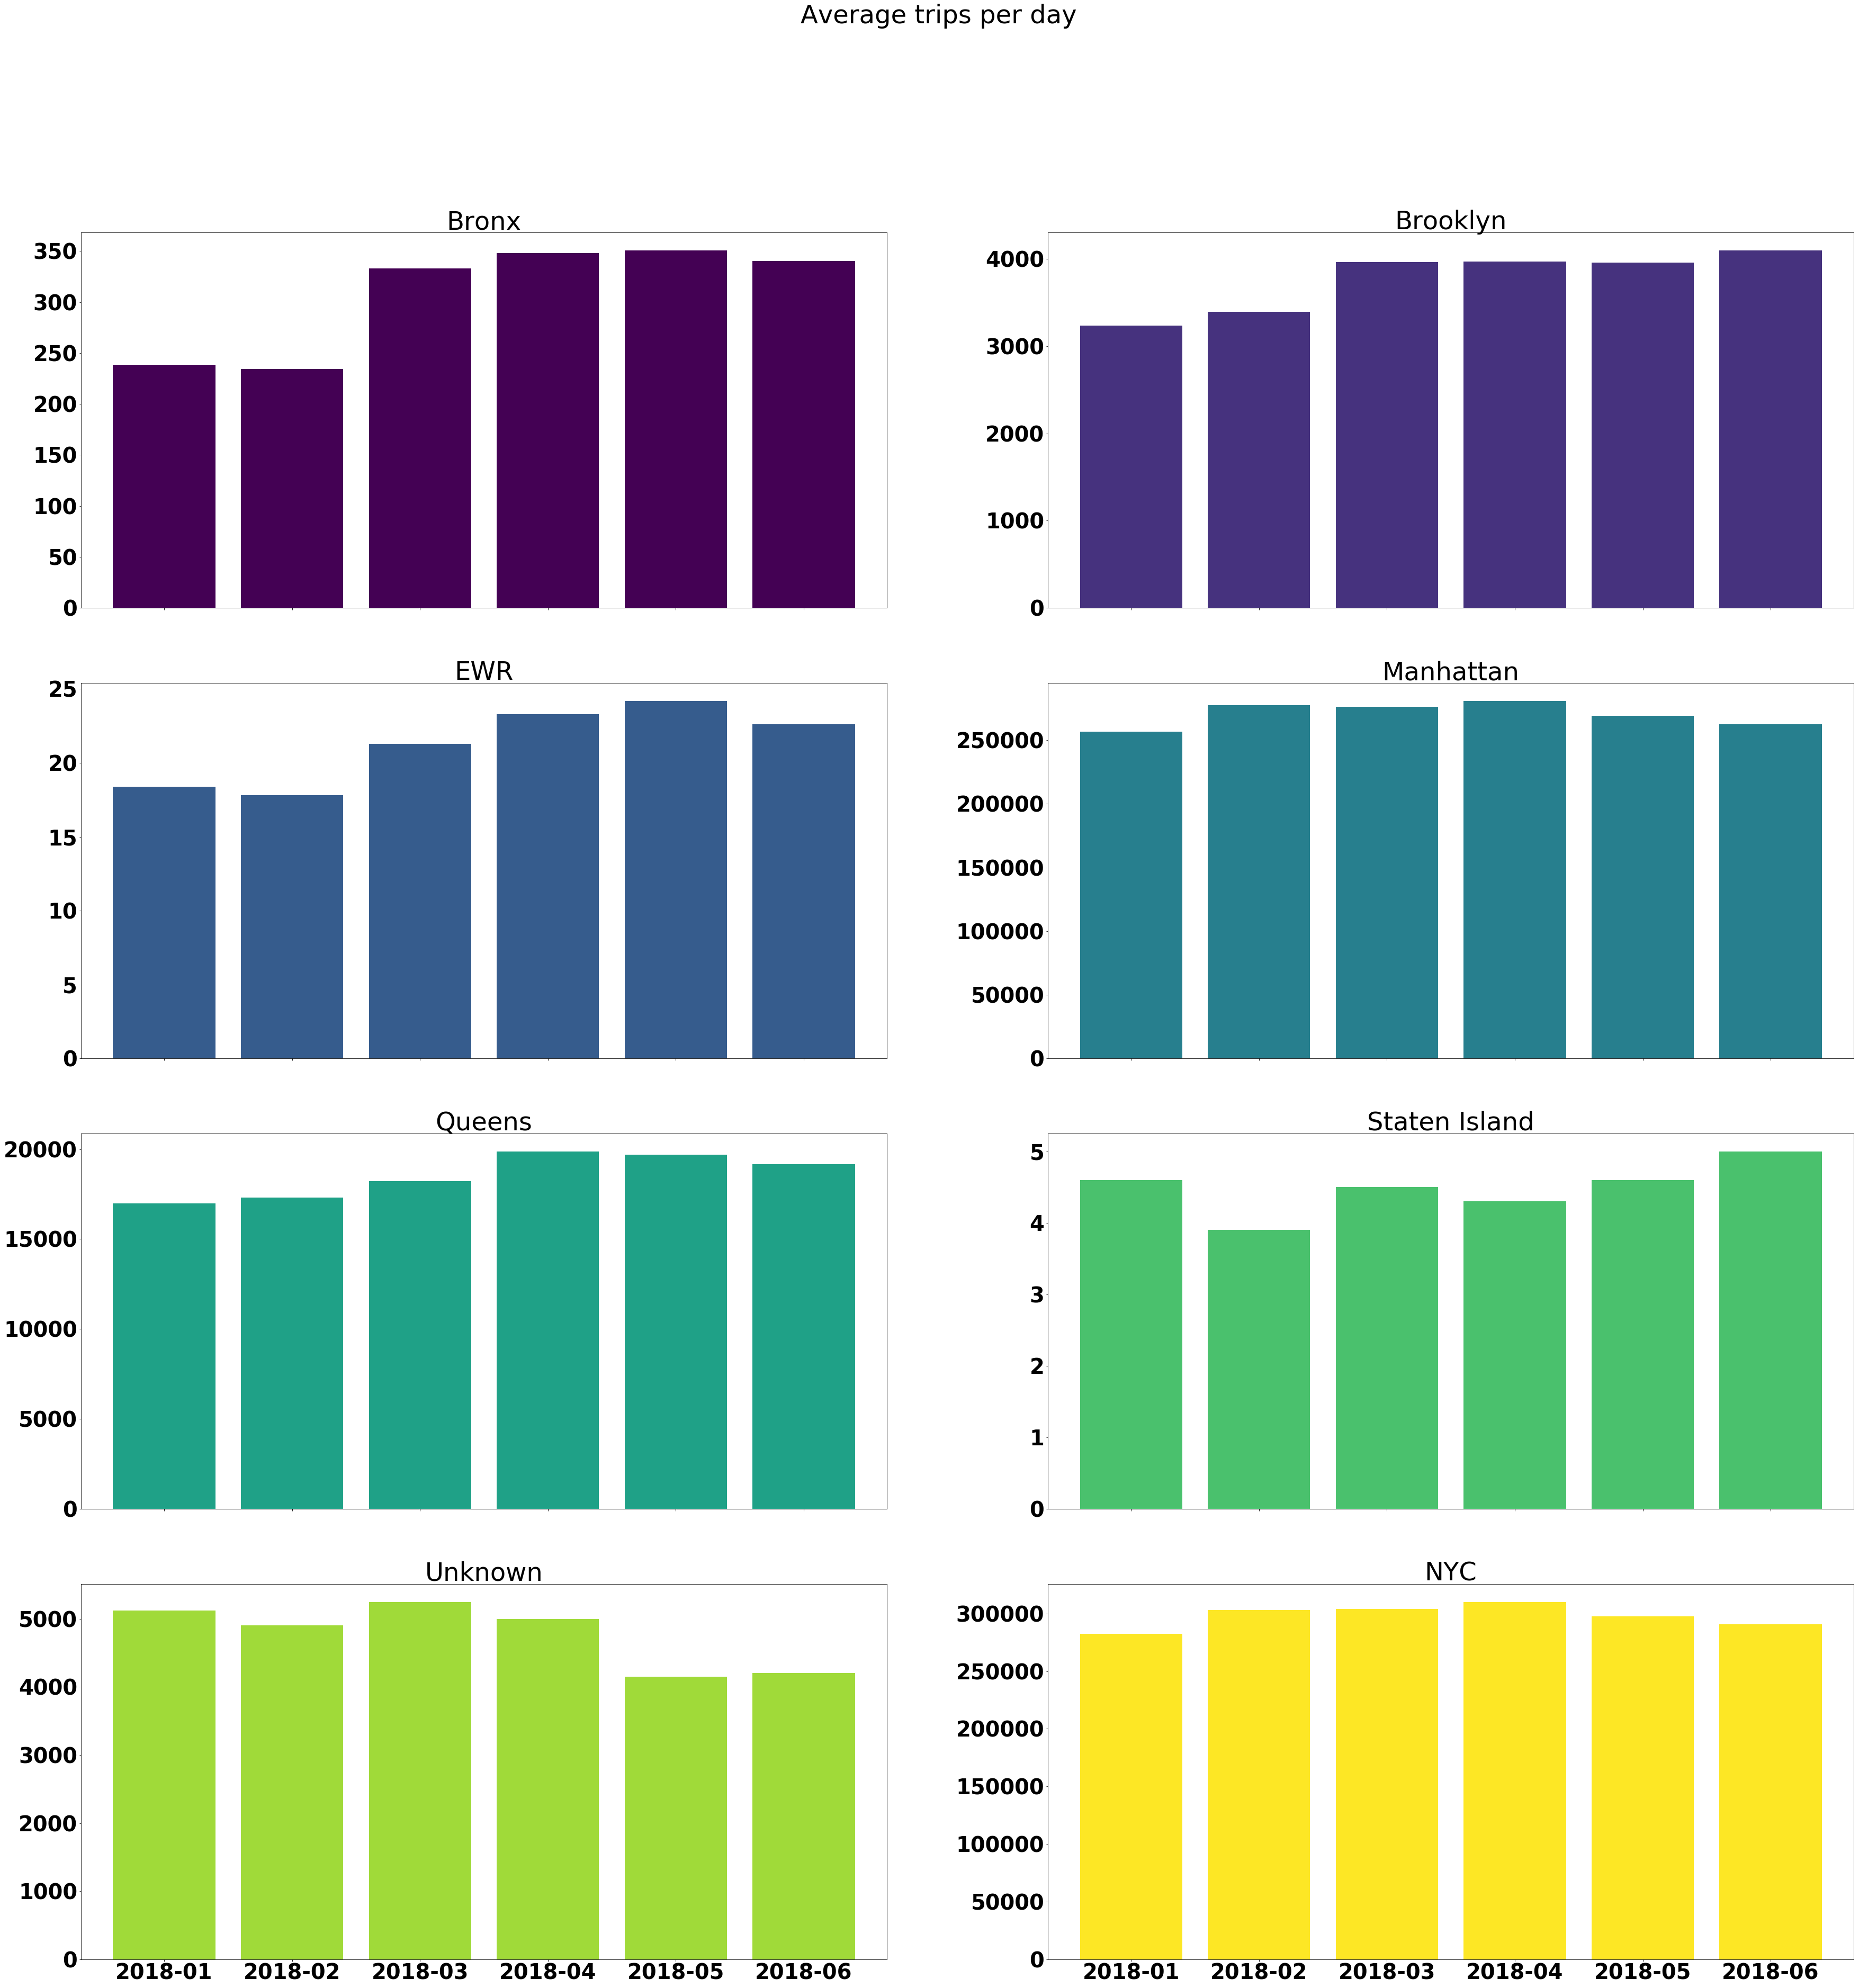

In [193]:
font = {'size'   : 40}
plt.rc('font', **font)

rq1.T.plot(kind = "bar", rot = 0, lw = 2,colormap = "viridis", figsize = (60,60),
             title ='Average trips per day', subplots = True, layout=(4,2), legend = False, grid = False, width = 0.8)
plt.show()


In general, average trips per day seems to have a uniform distribution during the year. Anyway, we can see that, for some of them, there are more trips in early summer (i.e. Staten Island... beach, girls and luna parks) and viceversa for some others.

### [RQ2]
What are the time slots with more passengers? Set your own time slots and discover which are those when Taxis drive the highest number of passengers overall New York and repeat the analysis for each borough. Provide the results through a visualization and comment them.

### Answer :

In order to satisfy the request, we implemented a function that takes the number of months we are interested in and the choosen slots and returns a Data Frame indexed by borough (also all NYC) and containing the number of passengers registered in each time slot. We used RegExs to localize each slot and, in this way, we're pretty sure that there are not weird data (in pickup datetime, as RQ1), automatically "filtered" by the regex matching.

In [180]:
slots = ["0[0-6]","0[7-9]","1[0-5]","1[6-9]","2[0-3]"]

rq2 = h.RQ2(slots, 6)
rq2


,from 00:00 to 06:59,from 07:00 to 09:59,from 10:00 to 15:59,from 16:00 to 19:59,from 20:00 to 23:59
Borough,,,,,
Bronx,19417,17626,24692,15678,12541
Brooklyn,275767,149713,202146,181416,280561
EWR,636,699,2474,1622,335
Manhattan,9323341,10152378,24050609,18413481,16477855
Queens,611130,606214,1646774,1329949,1251222
Staten Island,366,123,320,224,218
Unknown,155102,142663,367916,293713,257574
NYC,10385759,11069416,26294931,20236083,18280306


As we can see from the resulting df, most of the passngers move from 10:00 to 15:59. This is a thing we can expect, because it's launch and branch time, and, for many people, it's time to go to work or coming back home. In general, there are more runs in the afternoon, and this may be explained also for the huge presence of tourists and people that stopped working.

Moreover, We've to consider the presence of Wall Street in Manhattan which closes at about 16:00 o'clock and this is perfectly according with the results.

 It's a good idea to plot the results as in RQ1:

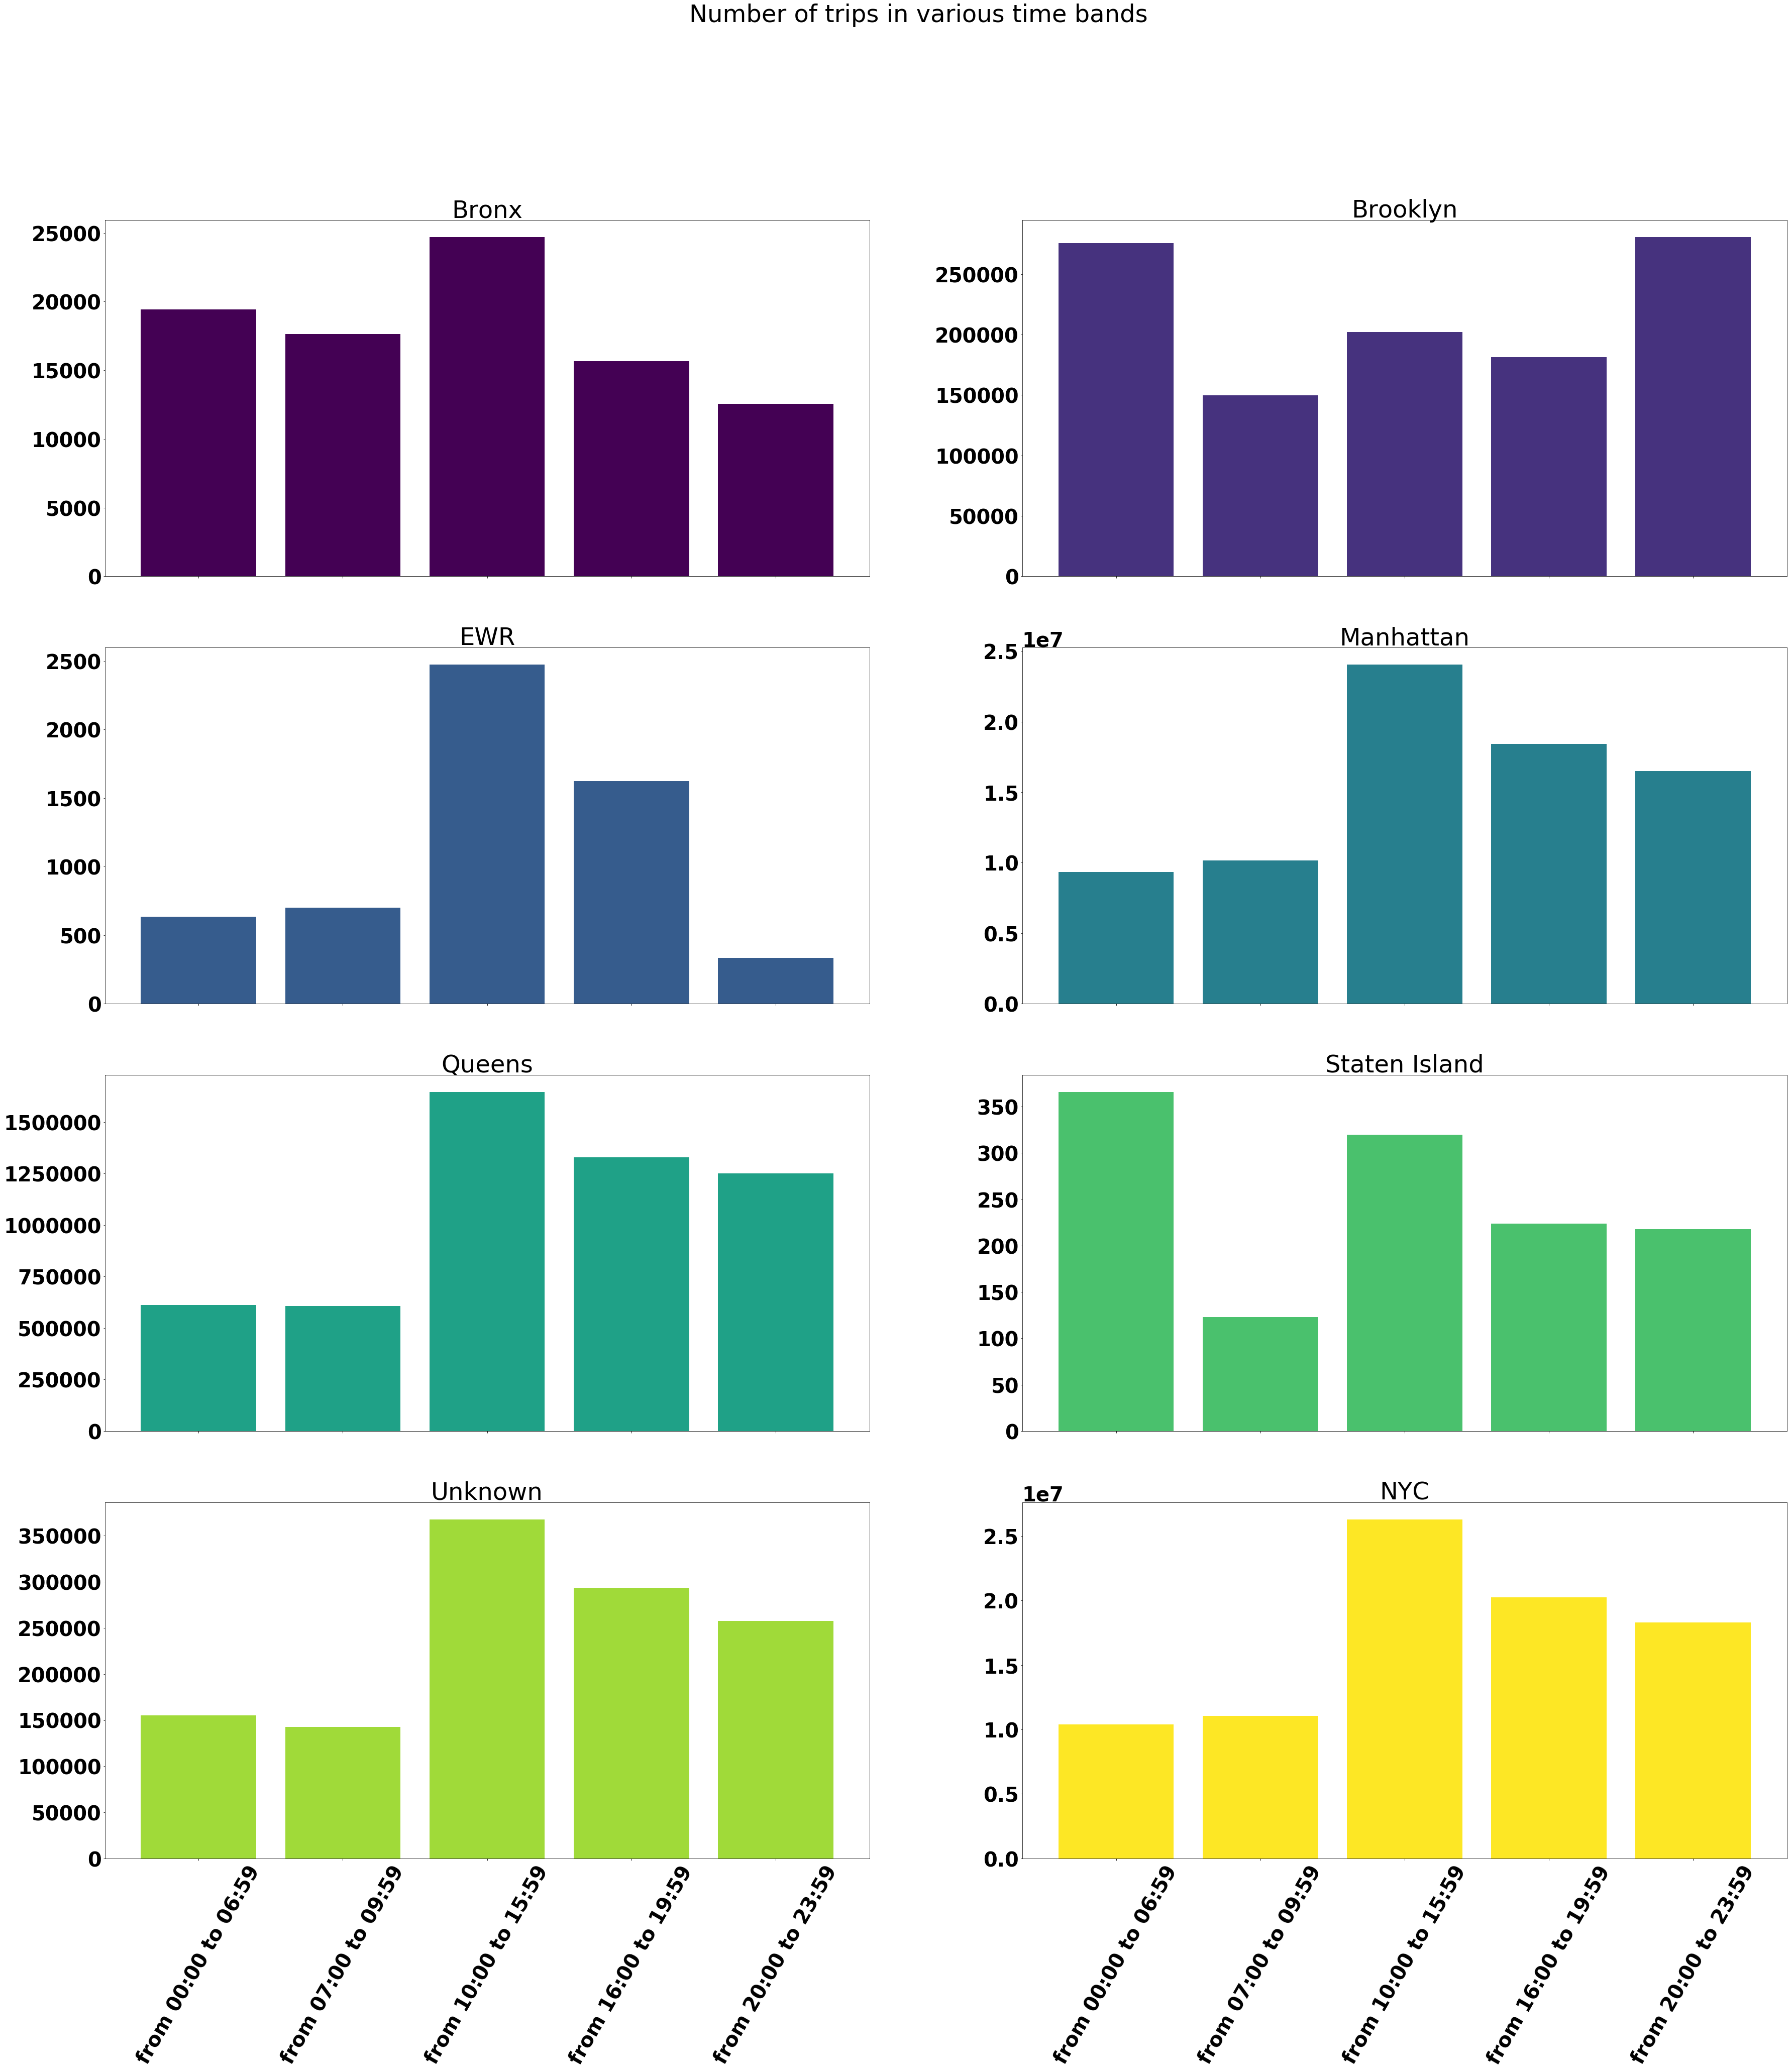

In [194]:
font = {'size'   : 40}
plt.rc('font', **font)

rq2.T.plot(kind = "line", rot = 60, lw = 2,colormap = "viridis", figsize = (60,60),
             title ='Number of trips in various time bands', subplots = True, layout=(4,2), legend = False, width = 0.8)
plt.show()

### [RQ3]
Do the all trips last the same? Let's put our attention on the distribution of trip's duration. Provide a plot for it and comment what you see. Run this analysis for NYC and for each borough (and obviously comment the results!).

### Answer:

In order to satisfy the request, we implemented a function that takes the number of months we are interested in and the slots for trip durations we've choosen and returns a Data Frame indexed by borough (also all NYC) and containing the number of trips of each choosen duration. We implemented a function that computes the trip duration and then classifies the trips by their duration slot.

In [254]:
deltas = [1,5,10,20,30,60,120,240] # To avoid strange and non interesting data, we focus our attention on trips 
                                   # which lasted at most 4 hours and at least 1 minute
rq3 = h.RQ3(deltas, 6)
rq3

,Between 1 and 5 mins,Between 5 and 10 mins,Between 10 and 20 mins,Between 20 and 30 mins,Between 30 and 60 mins,Between 60 and 120 mins,Between 120 and 240 mins
Borough,,,,,,,
Bronx,6659.0,11116.0,16213.0,7747.0,8110.0,1591.0,63.0
Brooklyn,93674.0,171718.0,233038.0,103170.0,60105.0,5620.0,94.0
EWR,438.0,24.0,32.0,37.0,82.0,30.0,0.0
Manhattan,7768825.0,15416025.0,17336926.0,5561568.0,2303196.0,182956.0,3603.0
Queens,117756.0,189441.0,499444.0,740097.0,1440775.0,266254.0,3015.0
Staten Island,80.0,77.0,117.0,66.0,117.0,58.0,3.0
Unknown,127437.0,240108.0,271691.0,94657.0,53692.0,6341.0,165.0
NYC,8114869.0,16028509.0,18357461.0,6507342.0,3866077.0,462850.0,6943.0


From the data, it's already possible write down some comments, but it's more useful plot them and take a look at the distribution.

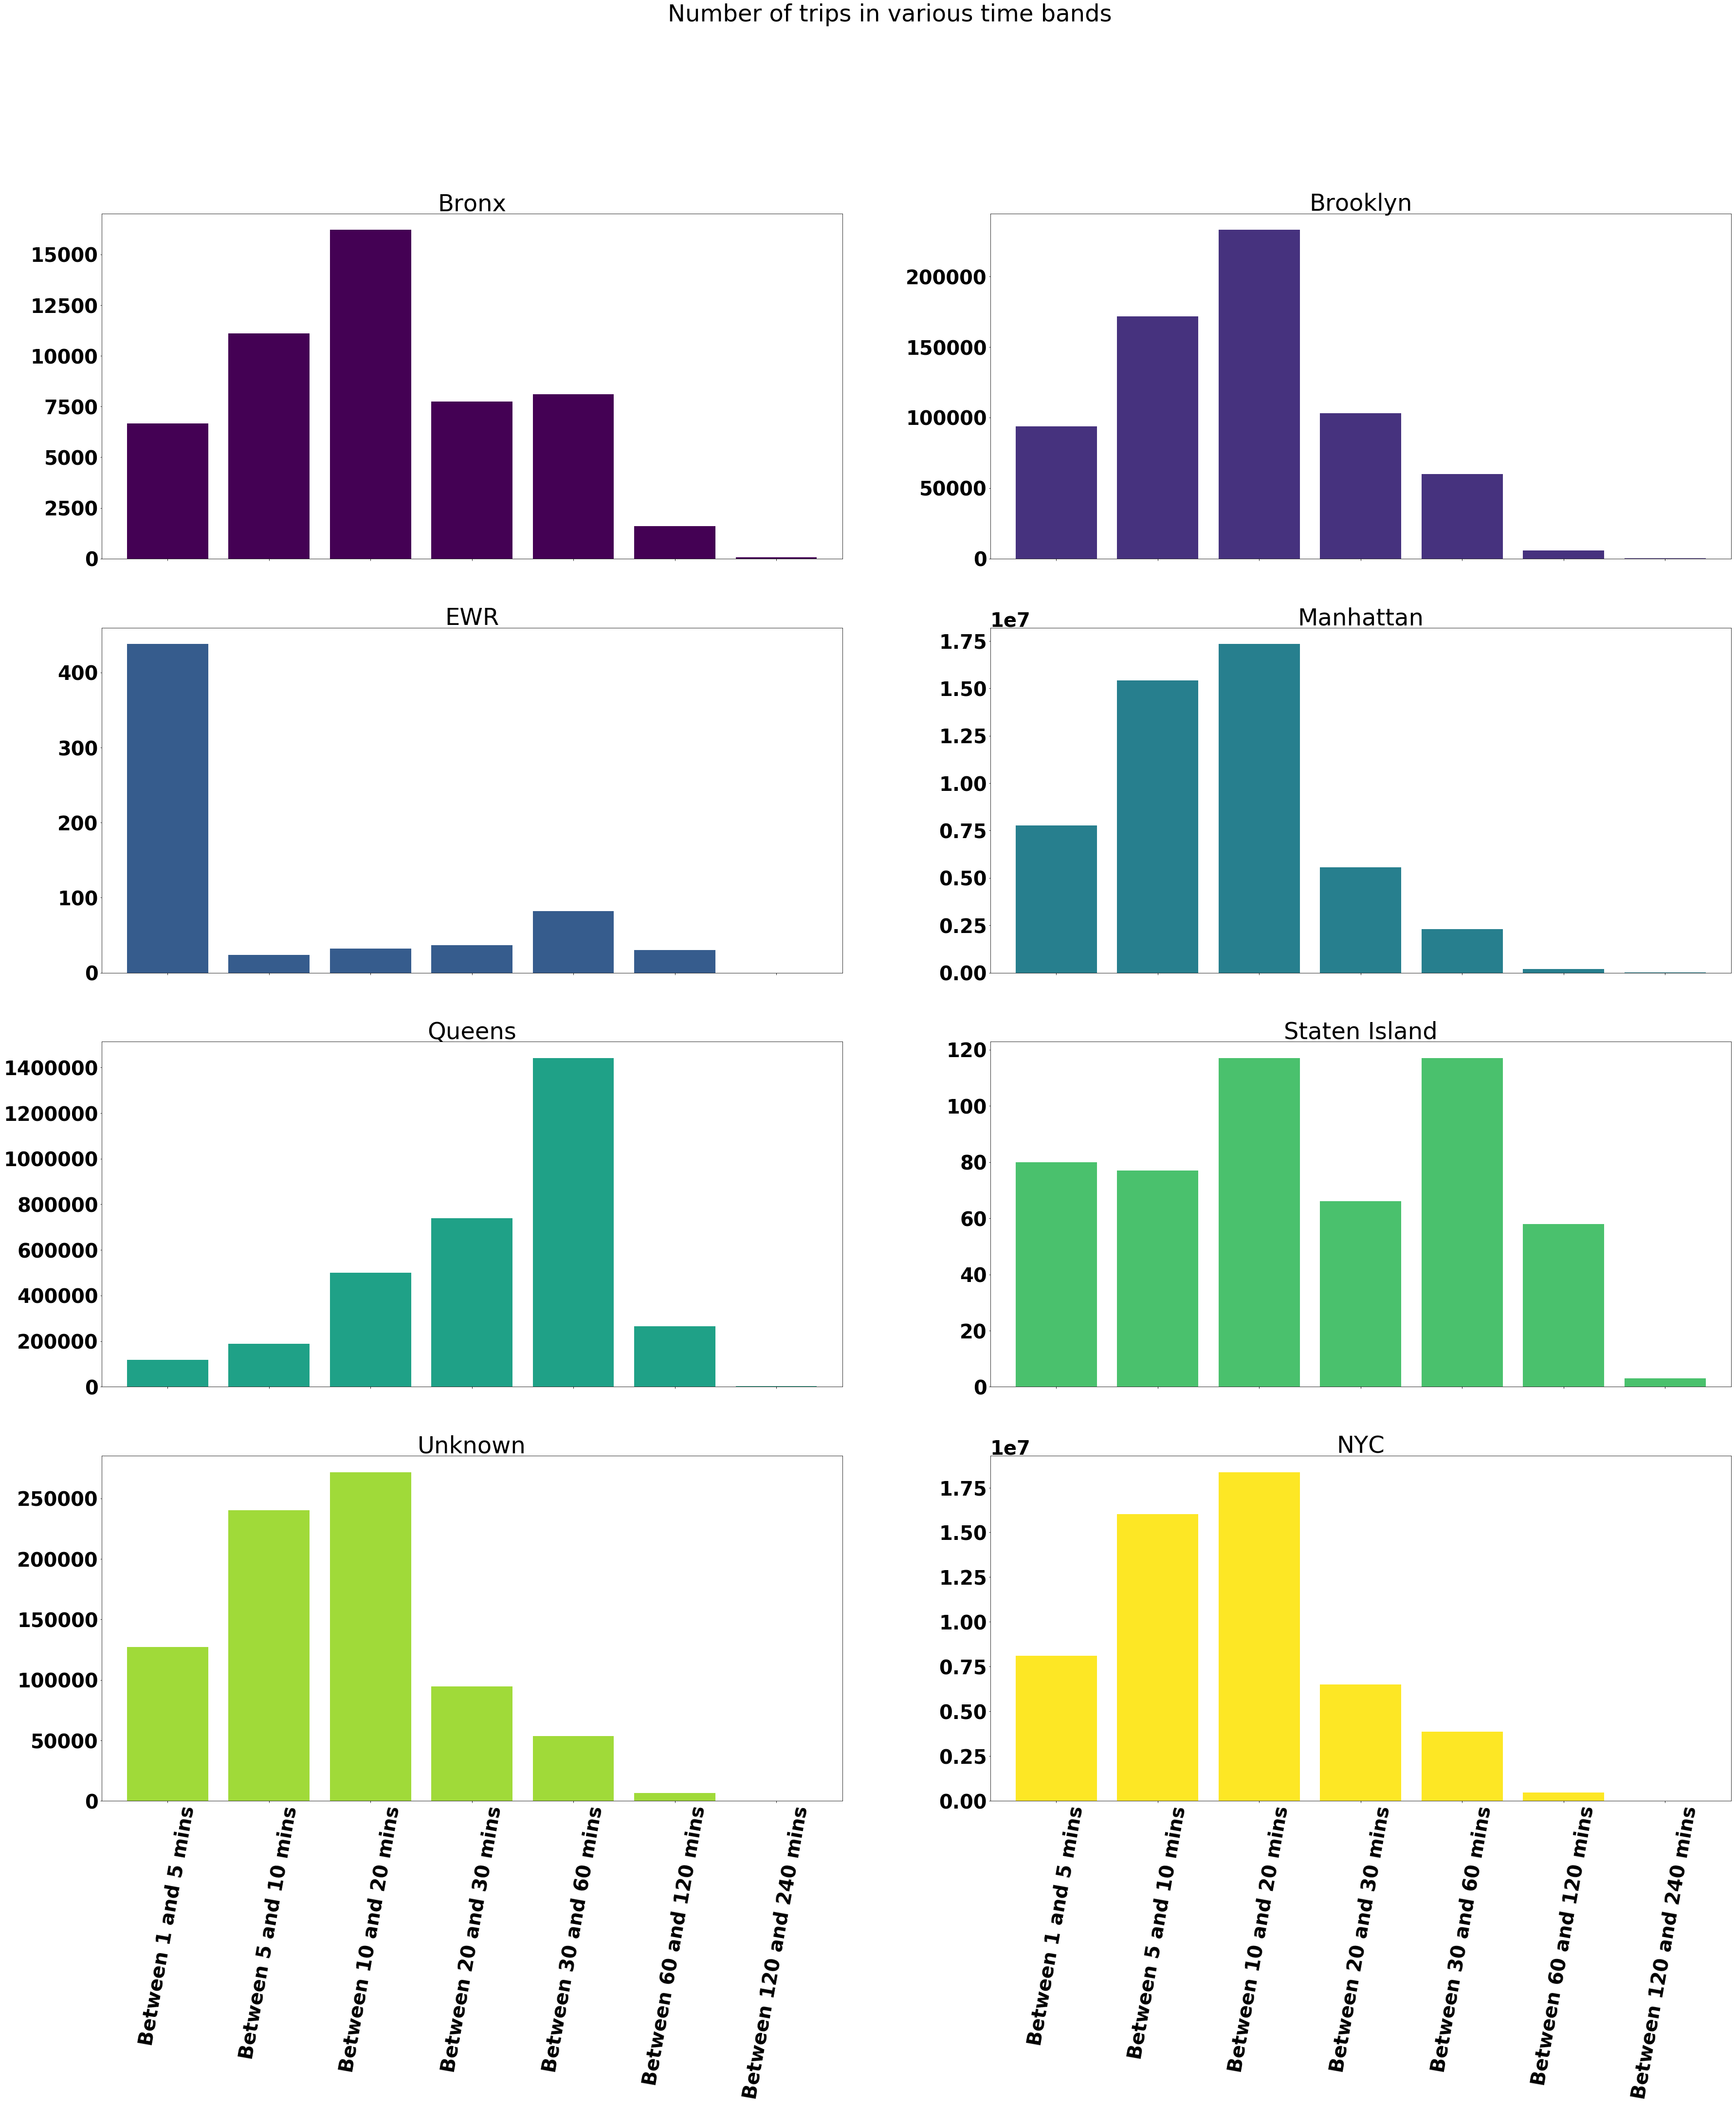

In [255]:
font = {'size'   : 40}
plt.rc('font', **font)

rq3.T.plot(kind = "bar", rot = 80, lw = 2,colormap = "viridis", figsize = (60,60),
             title ='Number of trips in various time bands', subplots = True, layout=(4,2), legend = False, width = 0.8)
plt.show()

It's very cool that all the boroughs with more samples prensent the same distribution that can be estimate with a Beta distribution whose parameters can be inferred. Seems reasonable that the most populated band is "from 15 to 20 mins". The fact that there are a lot of runs also between 5 and 10 minutes is an index of people that probably work in different places in a short time. Stats say that life is becoming always more hectic.

Of course, we could expect that really few trips lasted more then 1 hour.

Some boroughs seem to have a different behaviour, but this can be explained by the small number of available samples, or for other logistical reasons that cannot be investigated from this data.

Later we'll analyze how this trips durations influence tha fare amount.

### [RQ4]
What is the most common way of payments? Discover the way payments are executed in each borough and visualize the number of payments for any possible means. Then run the Chi-squared test to see whether the method of payment is correlated to the borough. Then, comment the results.

 ### Answer:

In order to satisfy the request, we implemented a function that takes the number of months we are interested in and and returns a Data Frame indexed by borough (also all NYC) and containing the number of payment of each type. Then we implemented a function that computes the Chi Ssquared test on the df.

In [196]:
p,c,ct = h.RQ4(6)

In [197]:
display(p)

,Credit Card,Cash,No Charge,Dispute
Borough,,,,
Bronx,27788,26147,1515,360
Brooklyn,441890,230533,8789,1923
EWR,3036,551,220,47
Manhattan,34188788,14480638,226799,63615
Queens,2311245,1000704,37296,8937
Staten Island,434,318,50,13
Unknown,595317,255817,10652,2313
NYC,37568498,15994708,285321,77208


The Chi Squared test result obtained with our "Handmade" function:

In [203]:
print(c)

72006.9075441084


The Chi Squared test result obtained with SciPy :

In [210]:
chi = pandas.Series(ct[0:2],index = ["Chi Squared", "p-value"]).to_frame().T
chi.index.names = ['SciPy']
display(chi)


,Chi Squared,p-value
SciPy,,
0,72006.907544,0.0


As we can see from the results , credit cards are the most used type of payment . This makes sense and allow us to check the collateral trend of people to mostly use elctronic ways of payment.

The Chi Squared Test returns an high value with an about-zero associated p-value (high level of statistical significance). This means that the null hypothesis (that is payment type independent from Boroughs) is rejected and a conclusion is made that type of payment is associated with Boroughs. 

We can try to graphically get the pattern of this relationship and a good way to do this can be plotting all the df on a single bar plot.

<Figure size 432x288 with 0 Axes>

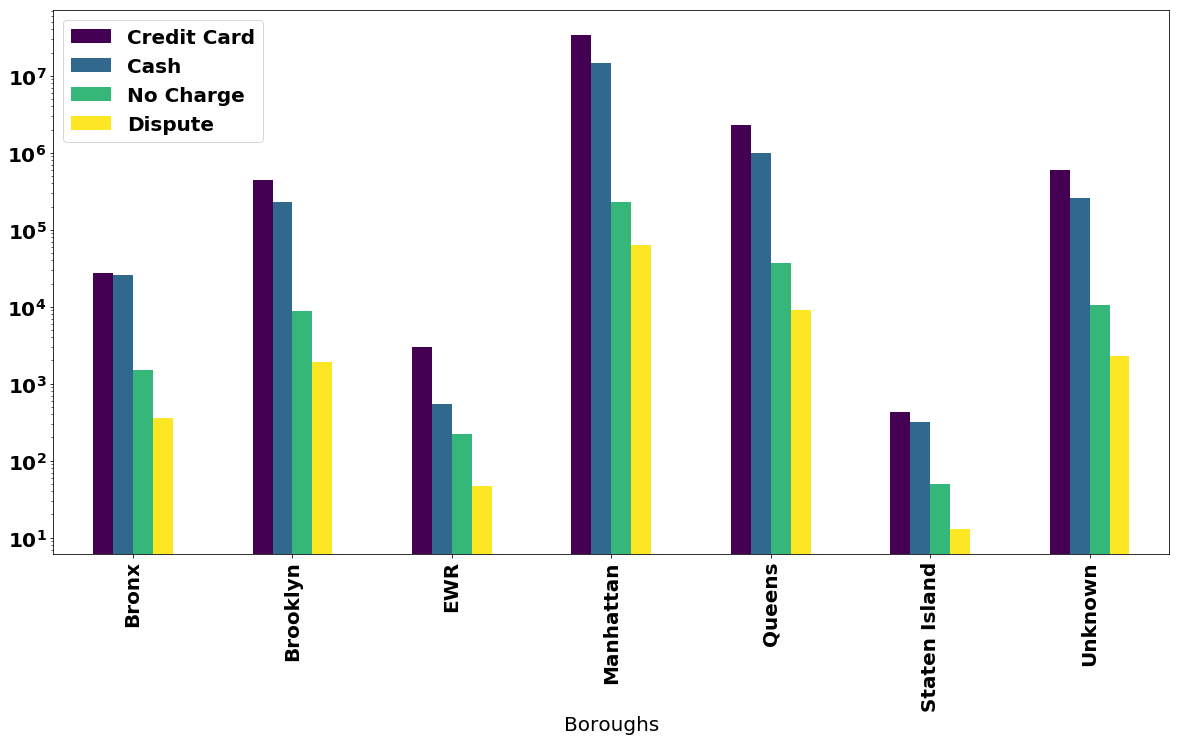

In [224]:
plt.figure()
p.iloc[0:7,:].plot( kind = "bar", logy = True, colormap = "viridis", figsize = (20,10))
plt.legend(loc=2, prop={'size': 20})
plt.xlabel("Boroughs")
font = {'size'   : 20}
plt.rc('font', **font)

The number of payments is on a $\,log-scale\,$ , in order to get a better visualization of all boroughs due to the fact that numbers are very different. As we can see, the pattern seems pretty similiar in every borough, but not at all, and this difference is what makes payment type not independent from location . This can be appreciated also on a linear scale.

<Figure size 432x288 with 0 Axes>

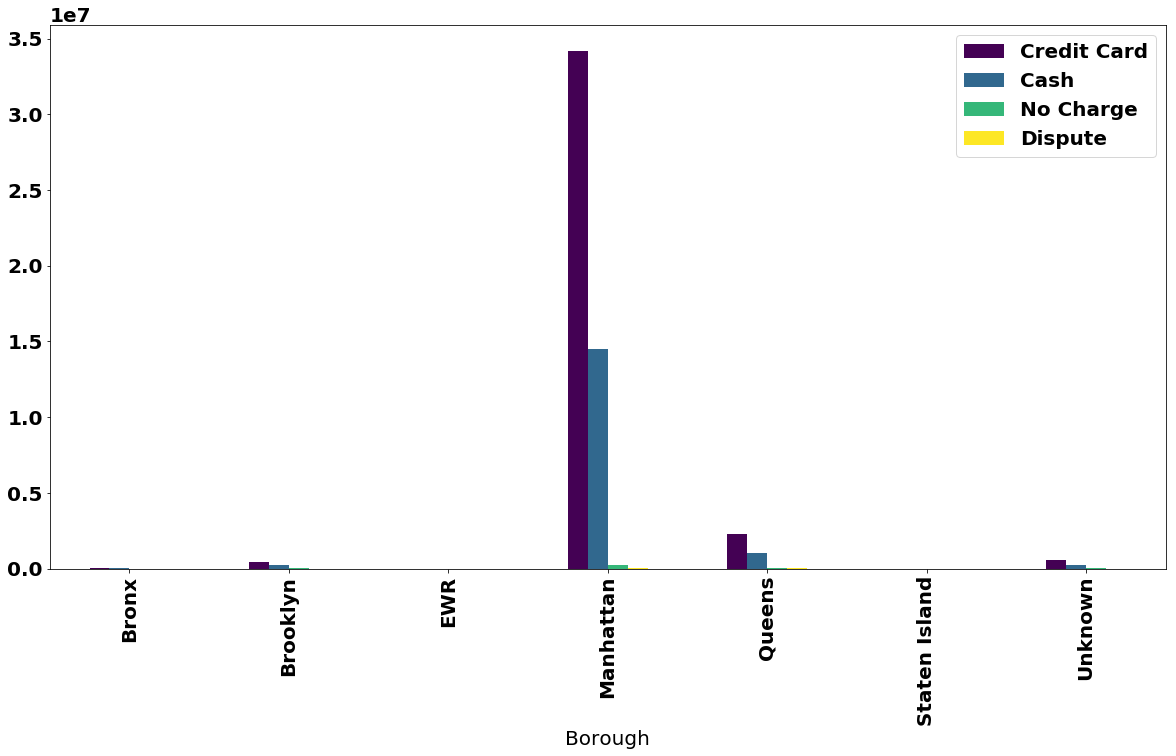

In [225]:
plt.figure()
p.iloc[0:7,:].plot( kind = "bar", colormap = "viridis", figsize = (20,10))


We could expect that type of payment is correlated with the borough. Some zones, with an high percentage of poor people, are not totally comfortable with credit cards. Instead, business zones in Manhattan surely have a lot of credit cards payments.

### [RQ5]
Does a long distance correlate with the duration of the trip on average? Make a plot that show the dependence between distance and duration of the trip. Then compute the Pearson Coefficient, is it significant? Comment the results you obtain.

### Answer:

In order to satisfy the request, we implemented a function that takes the number of months we are interested in and returns a Data Frame indexed by trip, containing trips durations and trips distances, and the Pearson Coefficient between them.

In [3]:
pearson_coefficient, d = h.RQ5(6)


In [5]:
pearson_coefficient

0.02263960530484035

The obtained Pearson Coefficient indicates that trip distance and trip duration are not linearly correlated. It makes sense, due to the fact that there are other variables we didn't consider, like traffic, day, the topography of the itinerary,ecc. 

Of course, this variables produce many equals durations that belong to different distance, and this clearly can't relate to a linear relationship.

But the value is still smaller than we can expect. For this application, the correlation coefficient seems not to give us much information.

Let's take a look to this "messy" relationship plotting a random sample of records (dimension = 10% of the total df).



Text(0,0.5,'trip_duration')

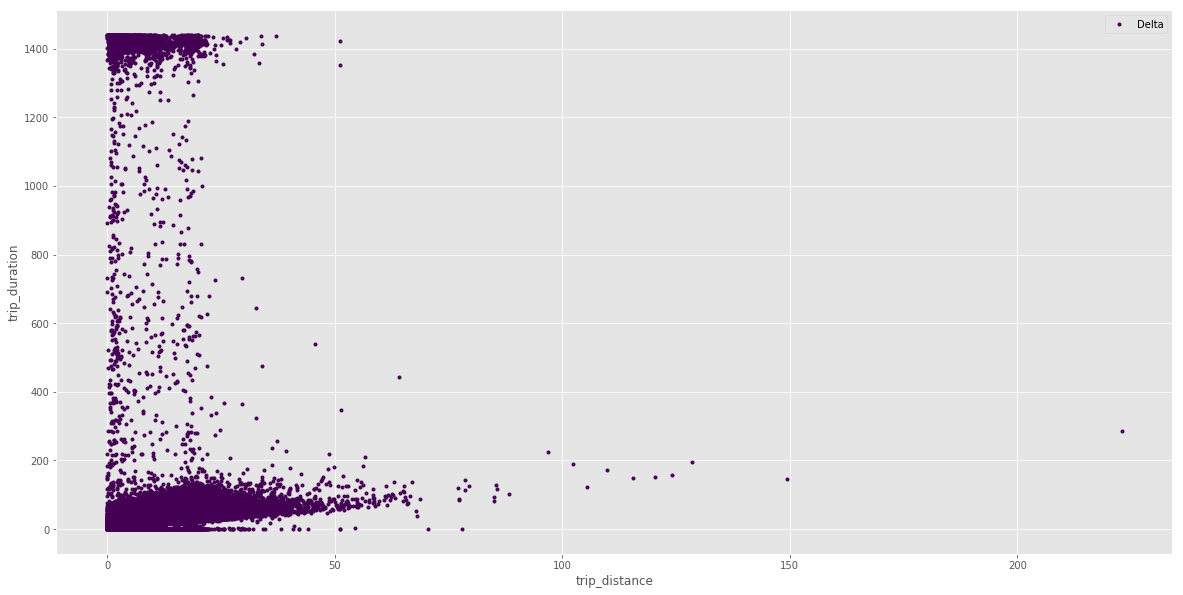

In [21]:
d = d.sample( frac = 0.05 , replace = False)
d = d.sort_values("trip_distance")
matplotlib.style.use("ggplot")
d.plot(style = ".", x = "trip_distance", y = "Delta", figsize = (20,10), colormap = "viridis",lw= 2.5)
plt.ylabel("trip_duration")

This graph look absolutely ugly, creepy and not informating, one of the worst thing we've ever seen.

What are we missing?

Let's go deeper. 

Looking at the graph, some results look very weird. NY at rush hours is very busy, but 1400 mins for 1 mile seems too much. If we try to clean up the data by dropping weird durations, longest distances (200 miles? naaaah) and some duplicates, the result is completelly different.

Text(0,0.5,'trip_duration')

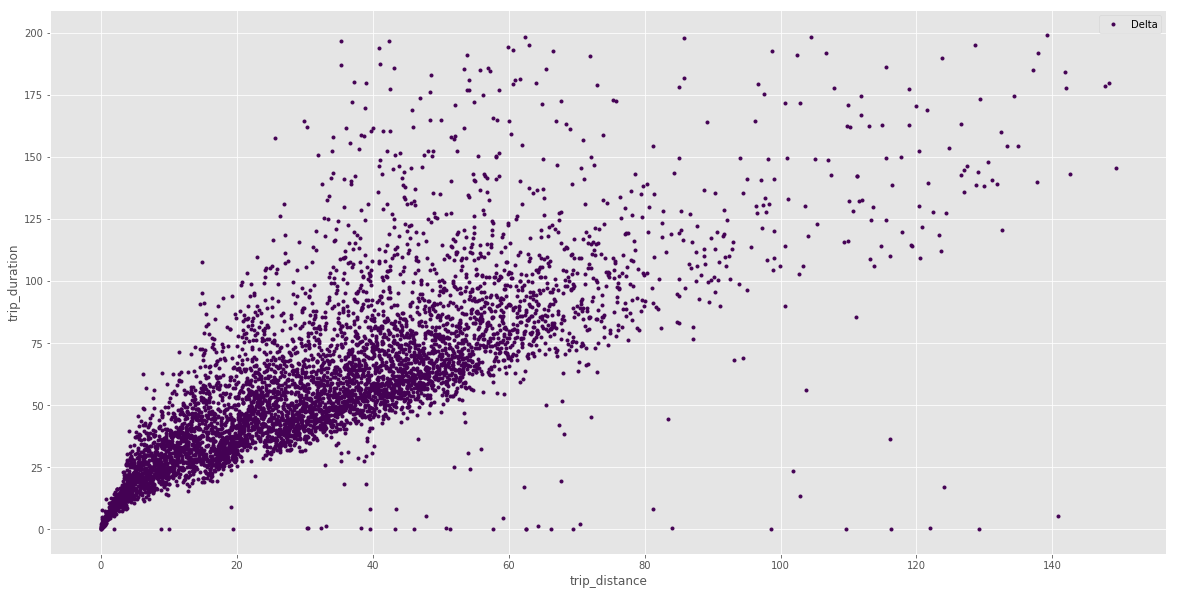

In [20]:
matplotlib.style.use("ggplot")
d.loc[(d["trip_distance"].duplicated() == False) & (d["trip_distance"]<150) & (d["Delta"]<200)].plot(style = ".", x = "trip_distance", y ="Delta",colormap = "viridis" ,lw = 2.5, figsize = (20,10))
plt.ylabel("trip_duration")

Now, it is clear that there is correlation between duration and distance. We can compute again the Pearson Coefficient on this sampled df to confirm what we see.

In [29]:
d

,Delta,trip_distance
38482522,0.516667,0.01
9057176,0.650000,0.01
18858566,12.150000,0.01
5488165,0.283333,0.01
53525386,0.050000,0.01
7285291,0.100000,0.01
32162049,0.183333,0.01
52202992,4.000000,0.01
1398215,0.983333,0.01
20718323,0.416667,0.01


In [30]:
d["Delta"].corr(d["trip_distance"])

0.15926827267484206

The correlation coefficient is drastically larger. Of course, it is not very large, but we can expect this due to other variables and to a not perfect (maybe impossible) cleaning of the data.
All this issues produce the "white noise" we see in the graph. It may be counterproductive to cut other data, becouse some of that fluctuations can have real informative content.

At the end, sure you'll take more time to cover long distances, but don't forget about traffic!

## [CRQ1a] 
 Does the fare for mile change across NY's borough? We want to discover whether the expenses of a user that enjoys Taxis in one zone is different from those that uses it in another one.

- Considering the fare amount:

    - Compute the price per mile equation for each trip.
    
    - Run the mean and the standard deviation of the new variable for each borough. Then plot the distribution. What do you see?
    
    - Run the t-test among all the possible pairs of distribution of different boroughs.
    
Can you say that statistically significant differences, on the averages, hold among zones? In other words, are Taxis trip in some boroughs, on average, more expensive than others?


### Answer :

In order to satisfy the request, we implemented a function that takes the number of months we are interested in and returns some interesting Data Frames:


In [32]:
stats,t_test,trip_fare = h.CR1a(6)

The first one we show, trip_fare, gets all the trips with the associated price per mile.

In [33]:
trip_fare

,trip_distance,fare_amount,Borough,$/mile
0,0.50,4.50,Manhattan,9.000000
1,1.36,8.50,Manhattan,6.250000
2,0.30,4.00,Manhattan,13.333333
3,14.10,41.50,Manhattan,2.943262
4,8.77,29.00,Manhattan,3.306727
5,0.76,5.00,Manhattan,6.578947
6,1.06,6.50,Manhattan,6.132075
7,2.40,11.50,Manhattan,4.791667
8,1.40,6.00,Manhattan,4.285714
9,0.90,5.50,Manhattan,6.111111


This is apparently not so useful, but we can use it to check the distribution of $ \,\$/mile $, also on single boroughs . So, let's plot it.

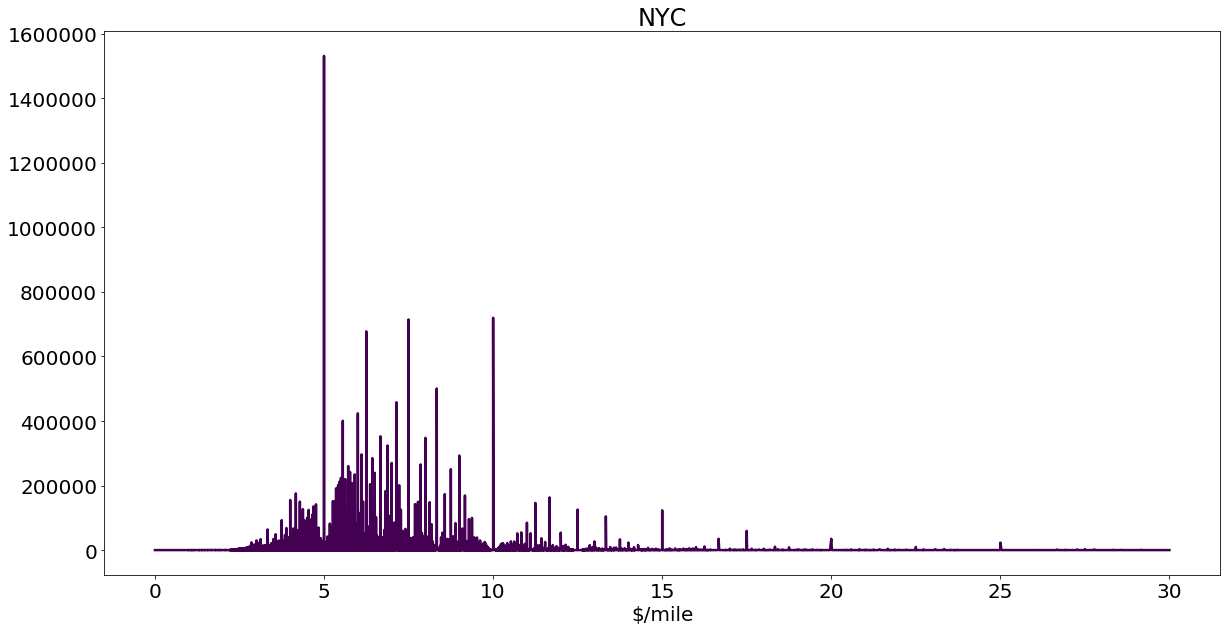

In [39]:
font = {'size'   : 20}
plt.rc('font', **font)
trip_fare.groupby("$/mile").count()["trip_distance"].plot(kind = "line", figsize = (20,10),colormap= "viridis", lw = 2.5, title = "NYC")


The distribution, ignoring data associated with higher prices that contain only a really really small part of the information, can be (very ) roughly approximated with a Gaussian. This is true olso for boroughs with high number of records and we're going to see this.It's reasonable to drop $ \$/mile >15$:

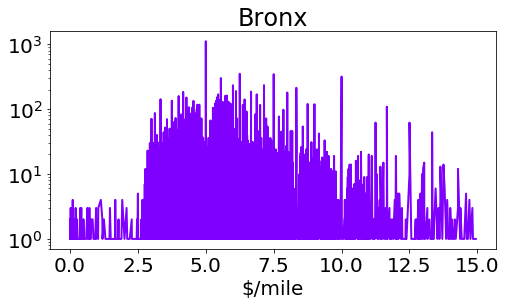

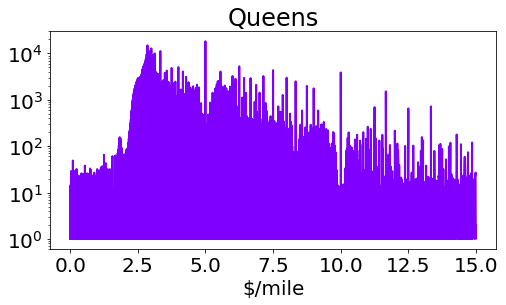

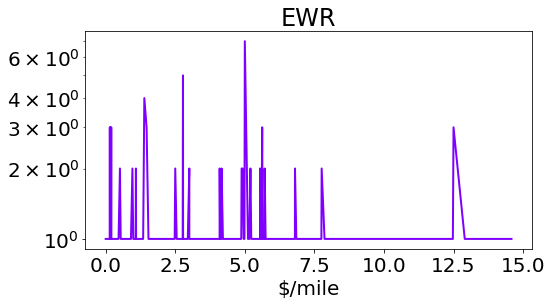

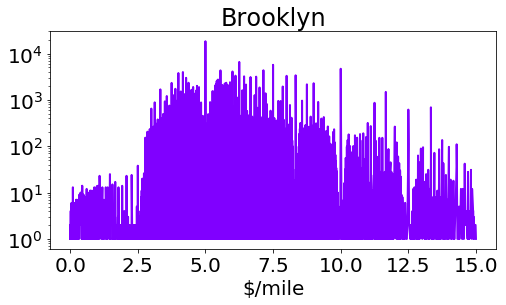

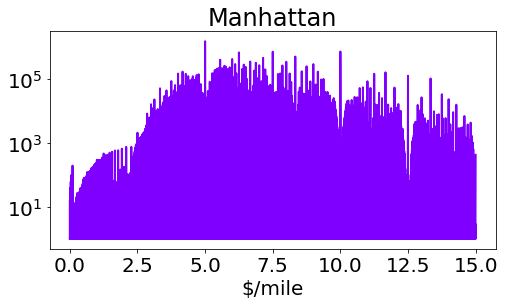

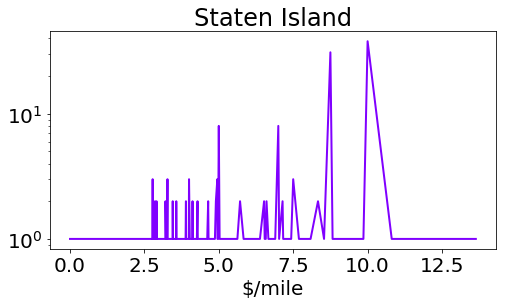

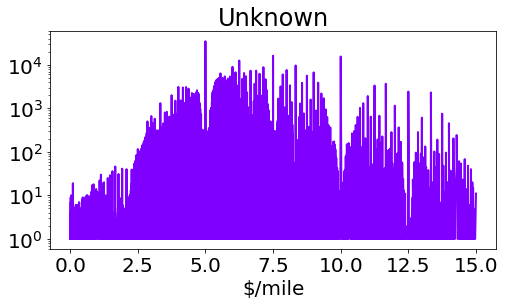

In [109]:
# Better visualization on a log-scale y axis

for bor in set(trip_fare["Borough"]) :
    trip_fare.loc[(trip_fare["Borough"] == bor) & (trip_fare["$/mile"] < 15)].groupby("$/mile").count()["trip_distance"].plot(kind = "line", figsize = (8,4), lw = 2, logy = True, rot = 0, colormap = "rainbow", title = bor )
    plt.show()
  

As we can see, the most of the price per mile are between 5 and 10 dollars, and this seems a good info. 

These data are statistically summarized by :

In [60]:
stats

,Mean,Std. Dev
Borough,,
Bronx,9.114254,107.984729
Brooklyn,6.252226,56.869275
EWR,913.454534,2348.648592
Manhattan,6.808196,60.050346
Queens,6.877857,106.990382
Staten Island,23.064067,128.208671
Unknown,23.483147,308.652135
NYC,7.075720,74.782696


In this case, make sense compute the t-test among all possible pairs of Boroughs to get a measure of how different are, on average, prices per mile in various Boroughs.

In [252]:
t_test

,t-score,p-value
Queens-Brooklyn,4.655591,3.230626e-06
Queens-Manhattan,1.906226,5.662095e-02
Queens-EWR,-259.003357,0.000000e+00
Queens-Staten Island,-3.766494,1.655589e-04
Queens-Bronx,-4.722541,2.329258e-06
Queens-Unknown,-79.739419,0.000000e+00
Brooklyn-Manhattan,-7.534965,4.884736e-14
Brooklyn-EWR,-271.014252,0.000000e+00
Brooklyn-Staten Island,-7.343729,2.079569e-13
Brooklyn-Bronx,-10.135013,3.877622e-24


In [ ]:
t_test

The test gives us something that we cannot intuitively expect: many of this distributions are different from each others due to high t-scores values and small p-values. So some boroughs, on average, are more expensive than others. There are few reasons for this: sure we don't have the same number of samples from each borough but, at the same time, we are not considering some important features, like traffic.

### [CRQ1b]
- The price per mile might depend on traffic the Taxi finds on its way. So we try to mitigate this effect:

    - Likely, the duration of the trip says something about the city's congestion, especially if combined with the distances. It might be a good idea to weight the price for mile using the time $T$ needed to complete the trip. Thus, instead of $P$, you can use $ P'= P/T $, where $T$ is the time needed to complete the trip.
    - Run the mean and the standard deviation of the new variable for each borough. Then plot the distribution. What do you see?
    - Run the t-test among all the possible pairs of new distribution of different boroughs.

Can you say that statistically significant differences, on the averages, hold among zones? In other words, are Taxis trip in some boroughs, on average, more expensive than others?


### Answer:

To perform this analysis, we just need to modify a bit the previous function.
Let's see what happens.

In [5]:
s,t,u = h.CR1b(6)

['EWR', 'Bronx', 'Unknown', 'Manhattan', 'Staten Island', 'Queens', 'Brooklyn']

Let's take a look to the updated, weighted, df:

In [4]:
u

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,fare_amount,Borough,Delta,w$/mile
0,2018-01-01 00:21:05,2018-01-01 00:24:23,0.50,4.50,Manhattan,3.300000,2.727273
1,2018-01-01 00:49:32,2018-01-01 00:59:52,1.36,8.50,Manhattan,10.333333,0.604839
2,2018-01-01 00:11:56,2018-01-01 00:14:35,0.30,4.00,Manhattan,2.650000,5.031447
3,2018-01-01 00:58:32,2018-01-01 01:43:45,14.10,41.50,Manhattan,45.216667,0.065092
4,2018-01-01 00:14:09,2018-01-01 00:44:06,8.77,29.00,Manhattan,29.950000,0.110408
5,2018-01-01 00:32:15,2018-01-01 00:35:54,0.76,5.00,Manhattan,3.650000,1.802451
6,2018-01-01 00:38:34,2018-01-01 00:45:19,1.06,6.50,Manhattan,6.750000,0.908456
7,2018-01-01 00:38:54,2018-01-01 00:52:02,2.40,11.50,Manhattan,13.133333,0.364848
8,2018-01-01 00:28:06,2018-01-01 00:32:34,1.40,6.00,Manhattan,4.466667,0.959488
9,2018-01-01 00:36:18,2018-01-01 00:41:33,0.90,5.50,Manhattan,5.250000,1.164021


 From this, we can check the new distributions of $\,\,\$/(T*mile)$, by also cutting outliers ( $\,\,\$/(T*mile)$ >1500)

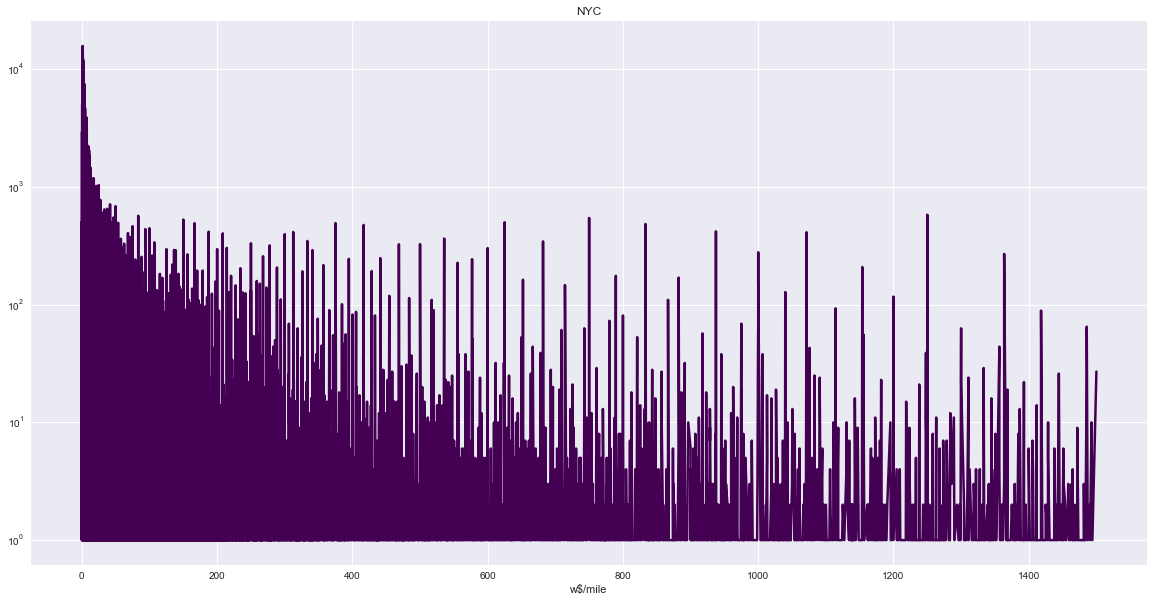

In [9]:
# Better visualization on a log-scale y axis
u.loc[u["w$/mile"] < 1500].groupby("w$/mile").count()["trip_distance"].plot(kind = "line", figsize = (20,10),colormap= "viridis", logy = True, lw = 2.5, title = "NYC")


As we can see, the distribution is drastically more regular and likely. We can plot boroughs distribution by cutting, as above, highest prices. We've choosen $ w\$/mile = 70 $ as threshold becouse all the information is on smaller values.

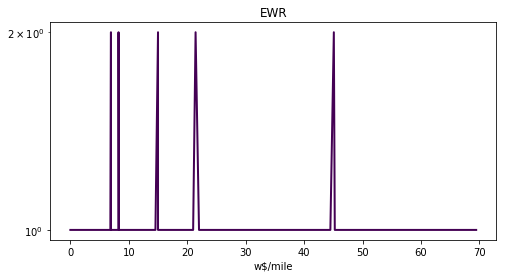

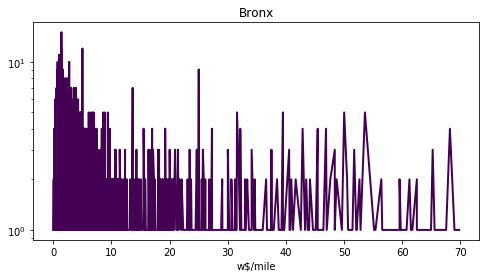

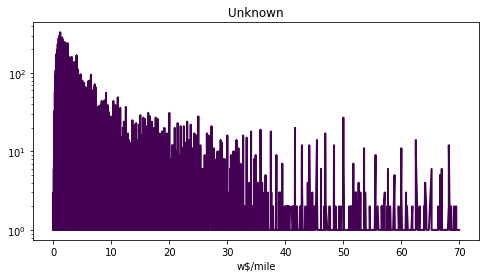

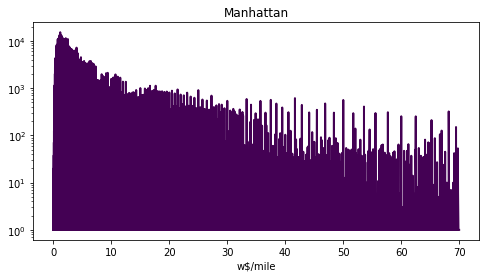

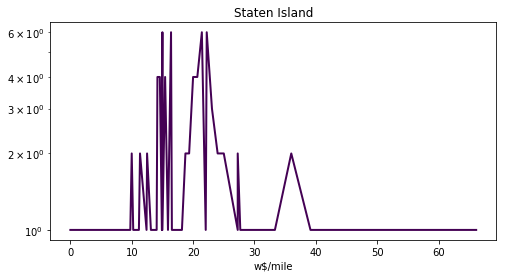

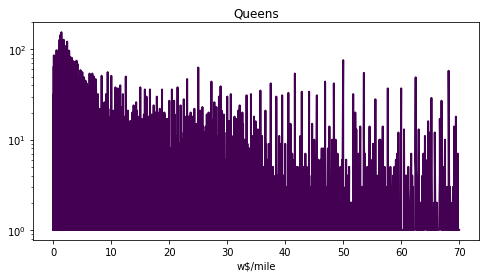

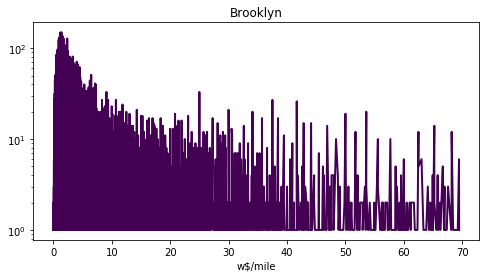

In [7]:
for bor in set(u["Borough"]) :
    u.loc[(u["Borough"] == bor) & (u["w$/mile"] < 70)].groupby("w$/mile").count()["trip_distance"].plot(kind = "line", figsize = (8,4), lw = 2, logy = True, rot = 0, colormap = "viridis", title = bor )
    plt.show()

The distributions with more records are now more similiar between them, and the biggest slice of mass is on the same, low values.

The complete distros are statistically summarized by :


In [6]:
s

,Mean,Std. Dev
Borough,,
Bronx,27.971075,1324.304299
Brooklyn,7.729957,530.392208
EWR,9321.521565,39733.923648
Manhattan,4.428689,449.974128
Queens,20.532032,1162.310735
Staten Island,84.619596,767.774972
Unknown,290.139308,6768.954628
NYC,9.940868,996.195242


Obviously high stds are caused by outliners that are cropped in distros above. Instead, means values for boroughs with more samples are very likely.

Now we can try to compute again the t-test among boroughs and see what happen. It not makes too much sense, due to the non Gaussian distros, so we expect strange values.

In [11]:
t

,t-score,p-value
EWR-Queens,223.683069,0.000000e+00
EWR-Brooklyn,182.218129,0.000000e+00
EWR-Bronx,51.924088,0.000000e+00
EWR-Staten Island,5.782414,8.744784e-09
EWR-Unknown,42.920675,0.000000e+00
EWR-Manhattan,629.134087,0.000000e+00
Queens-Brooklyn,8.832056,1.028099e-18
Queens-Bronx,-1.442770,1.490853e-01
Queens-Staten Island,-1.371762,1.701375e-01
Queens-Unknown,-68.096453,0.000000e+00


As expected, on the the whole dataframe ths situation hasn't changed so much, but we can try to compute the test on the restricted dfs showed previously.

In [8]:
import itertools as it
import scipy.stats as pstat
comb = list(it.combinations(list(set(u["Borough"])), 2))
w = u.loc[u["w$/mile"] <70]
t_test = pandas.DataFrame(columns = ["t-score","p-value"])
for bor in comb :
                t_test.loc[bor[0] + "-" + bor[1] ] = pandas.Series(pstat.ttest_ind(u.loc[u["Borough"]==bor[0]]["w$/mile"],u.loc[u["Borough"]==bor[1]]["w$/mile"]), index = ["t-score","p-value"])
t_test        

,t-score,p-value
EWR-Bronx,51.924088,0.000000e+00
EWR-Unknown,42.920675,0.000000e+00
EWR-Manhattan,629.134087,0.000000e+00
EWR-Staten Island,5.782414,8.744784e-09
EWR-Queens,223.683069,0.000000e+00
EWR-Brooklyn,182.218129,0.000000e+00
Bronx-Unknown,-8.809295,1.261637e-18
Bronx-Manhattan,11.860185,1.905736e-32
Bronx-Staten Island,-1.062121,2.881856e-01
Bronx-Queens,1.442770,1.490853e-01


Results show us that weighting the price per mile with trip duration seems not enough to mitigate the effect of other variables or obtain "more Gaussian" distributions. t-score is still high with small p-values in the most of the cases and we've to conclude that pairs are differents. But, should we really start thinking that some boroughs are more expensive than others?
It can be the right hypothesis, but t-test in this case is not the best choice.

Of course, another valid motivation can be the fact that we're applying the t-test on samples that have  very different sizes and some boroughs with really few samples to hypotize a shape for the distribution. Moreover, there are some outliers, but we can not exclude all of them (i.e. a trip distance = 0.50 with a price = 100$ is surely strange, but maybe the taxi was stopped to wait).

We can confirm this by looking better at the last df: the t-score, completely ignoring theoretical limits highlighted above, is smaller for couples of boroughs with about the same number of observations.

Anyway, I (Claudio) am not a statician and we have not yet studied this topic during the lessons, but i tried to understand how uncomfortable can be t-test in this situation.





## [CRQ2] 
Visualize Taxis movements! NYC is divided in many Taxis zones. For each yellow cab trip we know the zone the Taxi pick up and drop off the users. Let's visualize, on a chropleth map, the number of trips that starts in each zone. Than, do another map to count the races that end up in the single zone. Comment your discoveries. To perform this task we use the library folium. You find some examples of chorophlet maps here and here. The Geojson we use to trace the zones is taxi_zones.json in the Homework's repository.

In order to satisfy the request, we implemented a function that takes the number of months we are interested in and returns three folium maps. this maps, due to an issue in jupyter, are available as html files in the git.

In [20]:
n1,n2,n3 = h.taxi_visualization(3)

This first map shows the zone were data are recorded. 

Using an internal df built in the function that is grouped by zones and filled with number of picks and drops, we can structure a first Choropleth map that takes in account where and how many picks there were and a second Choropleth map for drops:

This visualization gives us the opportunity to confirm previous results. We can see that most of taxis move in Manhattan or near airports. Moreover, there are many picks around Times Square and olso Wall Street is a point of interest.

An interesting observations is that there many more picks than drops in airport. This tell us that many more people arrive than they leave. In fact, if we look at data about NYC population, we learn that there is a strong demographic increase (maybe not only for flights, obviously...).

### Conclusions
In this analysis we've tried to focus our attention to the most important features. We used some statistical tools and tried to interpretate them in the best possible way.

Of course, there is a long way to go but we had out baptism of fire and we're happy about this.

“Data Science is like teenage sex: everyone talks about it, nobody really knows how to do it, everyone thinks everyone else is doing it, so everyone claims they are doing it.” 
– Dan Ariely, Duke University